# Giới thiệu thuật toán Gradient Descent
**Giả sử để giải một bài toán máy học, chúng ta xây dựng được mô hình có hàm lỗi (loss function) như sau:**

$loss(w)=w^2+10sin(w)$ *_(với w là siêu tham số của mô hình)_*

**Nhiệm vụ của bài toán là đi tìm giá trị $w$ sao cho hàm lỗi $loss(w)$ đạt giá trị nhỏ nhất**

[np.float64(-1.306440008369511), np.float64(1.977383029328841), np.float64(3.8374671064990453)]


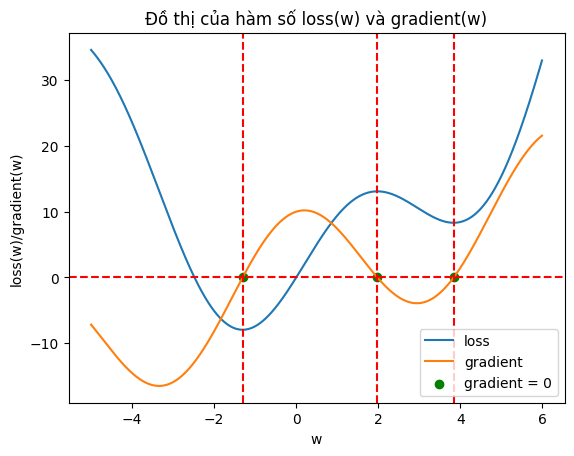

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, root_scalar
import numpy as np
import math

w = np.arange(-5, 6, 0.01)

# Định nghĩa hàm loss
def loss(w):
    return np.power(w,2) + 10 * np.sin(w)

# Tính đạo hàm riêng của hàm lỗi theo biến
def gradient(w):
    return  2*w + 10 * np.cos(w)

# Dự đoán nghiệm của phương trình gradient(w) = 0
initial_guesses = [-2, 2, 3]

# Giải phương trình gradient(w) = 0
zero_grad = [fsolve(gradient, guess)[0] for guess in initial_guesses]

zero_grad = [grad for grad in zero_grad if grad >= -5 and grad <= 6]

print(zero_grad)

plt.plot(w, loss(w), label='loss')
plt.plot(w, gradient(w), label='gradient')
plt.axhline(y=0, color='r', linestyle='--')
plt.scatter(zero_grad, gradient(np.array(zero_grad)), color='green', label='gradient = 0')

for grad in zero_grad:
    plt.axvline(x=grad, color='r', linestyle='--')

plt.title('Đồ thị của hàm số loss(w) và gradient(w)')
plt.xlabel('w')
plt.ylabel('loss(w)/gradient(w)')
plt.legend()
plt.show()

Nhìn vào đồ thị hàm số $loss(w)$ và $gradient(w)$, chúng ta thấy tại những điểm $w$ mà $gradient(w) = 0$ thì $loss(w)$ có giá trị __cực tiểu hoặc cực đại cục bộ__ *_(local minimum/maximum)_*. Như vậy để giải bài toán, chúng ta chỉ cần đi tìm tất cả các điểm local minimum rồi sau đó chọn điểm làm cho hàm lỗi đạt giá trị nhỏ nhất *_(điểm cực tiểu toàn cục - global minimum)_*. Tuy nhiên, trong các bài toán thực tế đạo hàm của hàm lỗi có thể rất phức tạp (số đặc trưng của mỗi điểm dữ liệu lớn) nên việc tìm các điểm local minimum bằng cách trực tiếp là bất khả thi.

Thay vào đó, chúng ta có thể xuất phát từ một điểm nào đó (initial point - $w_0$) mà chúng ta cho rằng nó gần với nghiệm của bài toán ($w_{goal}$). Sau đó thực hiện một vòng lặp để điều chỉnh $w_0$ *_tiến dần_* đến $w_{goal}$. __Gradient Descent(GD)__ và các biến thể của nó là một trong những thuật toán được dùng phổ biến nhất giải bài toán tối ưu theo hướng tiếp cận này.

Thuật toán __Gradient Descent(GD)__ dựa trên 2 nhận xét sau:
- Nếu tại điểm $w_i$ mà $gradient(w_i)>0$ thì $w_i$ nằm bên phải so với điểm $w_{goal}$. Nên để điểm tiếp theo $w_{i+1}$ gần với $w_{goal}$ hơn thì chúng ta cần di chuyển $w_i$ về phía bên trái (tức là giảm giá trị của $w_i$). Ngược lại, nếu tại điểm $w_i$ mà $gradient(w_i)<0$ thì $w_i$ nằm bên trái so với điểm $w_{goal}$. Nên để điểm tiếp theo $w_{i+1}$ gần với $w_{goal}$ hơn thì chúng ta cần di chuyển $w_i$ về phía bên bên (tức là tăng giá trị của $w_i$). Nói một cách ngắn gọn, thuật toán __Gradient Descent(GD)__ tìm nghiệm bằng cách __điều chỉnh tham số ngược dấu với đạo hàm__;
- Giá trị $gradient(w_i)$ càng lớn thì $w_i$ càng xa $w_{goal}$. Do đó, đơn giản nhất có thể chọn khoảng cách di chuyển giữa các lần cập nhật một lượng bằng $|gradient(w_i)|$

Ta có công thức cập nhật đơn giản như sau:
$$
w_{i+1}=w_i-lr*gradient(w_i)
$$
*_(Trong đó, dấu trừ "-" thể hiện việc cập nhật ngược dấu với đạo hàm và $lr$ (learning rate) là tốc độ học (có giá trị là một số dương) giúp điều khoảng cách di chuyển giữa các lần cập nhật_*

__Khi sử dụng thuật toán Gradient Descent(GD), việc lựa chọn điểm xuất phát ($w_0$) và tốc độ học ($lr$) sẽ ảnh hưởng đến kết quả của thuật toán này (độ chính xác của mô hình).__

# Yêu cầu bài tập
**Thực hiện tối thiểu hóa (minimization) hàm $loss(w)$ bằng các thuật toán sau đây:**
- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini-batch Gradient Descent
- Momentum Gradient Descent

Với mỗi thuật toán, khởi tạo các tham số theo yêu cầu và vẽ đồ thị biểu diễn giá trị $loss(w)$ và đường đi của $w$ sau mỗi bước cập nhật.
- $w_0$: điểm bắt đầu
- $lr$: tốc độ học
- $n$: số mẫu trong tập dữ liệu
- $max\_epoch$: số lần duyệt qua toàn bộ các mẫu dữ liệu

In [ ]:
# Các hàm hỗ trợ trực quan hóa kết quả
def plot_loss_history(loss_history, **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(loss_history)

    # Lựa chọn có vẽ từng điểm dữ liệu hay không (điểm màu đỏ). Mặc định không vẽ
    points = False
    if 'points' in kwargs:
        points = kwargs['points']
    if points == True:
        ax.scatter(np.arange(0,len(loss_history),1),loss_history[:], s = 90, color = 'r', edgecolor = 'w', linewidth = 2,zorder = 3)

    ax.set_xlabel('step')
    ax.set_ylabel('loss')
    ax.set_title('loss history')
    plt.show()

In [ ]:
def make_colorspec(w_hist):
    # make color range for path
    s = np.linspace(0,1,len(w_hist[:round(len(w_hist)/2)]))
    s.shape = (len(s),1)
    t = np.ones(len(w_hist[round(len(w_hist)/2):]))
    t.shape = (len(t),1)
    s = np.vstack((s,t))
    colorspec = []
    colorspec = np.concatenate((s,np.flipud(s)),1)
    colorspec = np.concatenate((colorspec,np.zeros((len(s),1))),1)
    return colorspec

def plot_w_history(w_history, loss_history, **kwargs):
    wmin = -5
    wmax = 5
    if 'wmin' in kwargs:
        wmin = kwargs['wmin']
    if 'xmax' in kwargs:
        wmax = kwargs['wmax']

    # Lựa chọn có vẽ đường nối giữa các điểm dữ liệu hay không. Mặc định không vẽ
    connector = False
    if 'connector' in kwargs:
        connector = kwargs['connector']

    fig, ax = plt.subplots(figsize=(8,4))

    # draw loss function
    w = np.arange(wmin, wmax, 0.01)
    ax.plot(w, loss(w))
    ax.set_xlabel('w')
    ax.set_ylabel('loss(w)')
    ax.set_title('w history')

    colorspec = make_colorspec(w_history)
    for i in range(len(w_history)):
        x = w_history[i]
        y = loss_history[i]
        ax.scatter(x, y, s = 30, color = colorspec[i],zorder = 3)
        # Vẽ đường nối giữa các điểm
        if connector and i > 0:
            pre_x = w_history[i-1]
            pre_y = loss_history[i-1]
            start_point = [pre_x, pre_y]
            end_point = [x, y]
            # straight line
            # ax.plot([pre_x, x], [pre_y, y], linestyle=':', color = colorspec[i],linewidth = 2,alpha = 1,zorder = 2)
            # arrow
            ax.annotate('', xy=end_point, xytext=start_point,
             arrowprops=dict(arrowstyle='->', linestyle='--', color=colorspec[i], lw=1))
    plt.show()

## 1. Batch Gradient Descent (BGD)

### Cài đặt Batch Gradient Descent (BGD)

In [ ]:
# Cài đặt Thuật toán Batch Gradient Descent (BGD)
def batch_GD(w0, lr, n, max_epochs=1):
    w = w0
    w_history = [np.array(w)] # Lưu giá trị tham số w trong quá trình tối ưu
    loss_history = [loss(w)] # Lưu giá trị của hàm lỗi trong quá trình tối ưu
    for epoch in range(max_epochs):
        total_grad = 0
        for i in range(n):
            # Tính đạo hàm riêng
            grad = gradient(w)
            total_grad += grad
        # Cập nhật tham số theo gradient
        w = w - lr * (total_grad / n)
        w_history.append(np.array(w))
        loss_history.append(loss(w))
    return w_history, loss_history

### BGD - Thực nghiệm 1:
*_w0 = -5.0, lr = 0.05, n = 20, max_epochs = 10_*

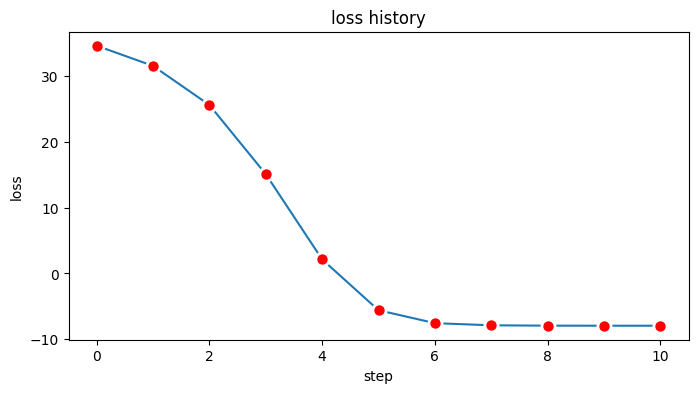

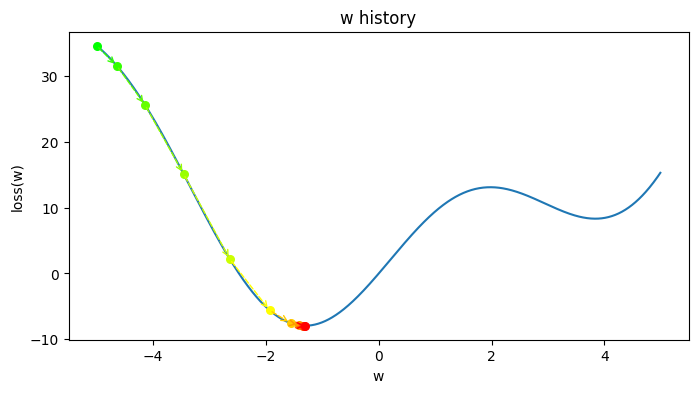

In [ ]:
# BGD - THỰC NGHIỆM 1

# Khởi tạo
w0 = -5
lr = 0.05
n = 20
max_epochs = 10

# Tối ưu bằng Batch Gradient Descent
(w_history, loss_history) = batch_GD(w0, lr, n, max_epochs)
loss_history_1 = loss_history
w_history_1 = w_history

# Minh họa kết quả
plot_loss_history(loss_history, points = True)
plot_w_history(w_history, loss_history, connector=True, wmin= -5, wmax = 6)

### BGD - Thực nghiệm 2:
*_w0 = -5.0, lr = 0.1, n = 20, max_epochs = 10_*

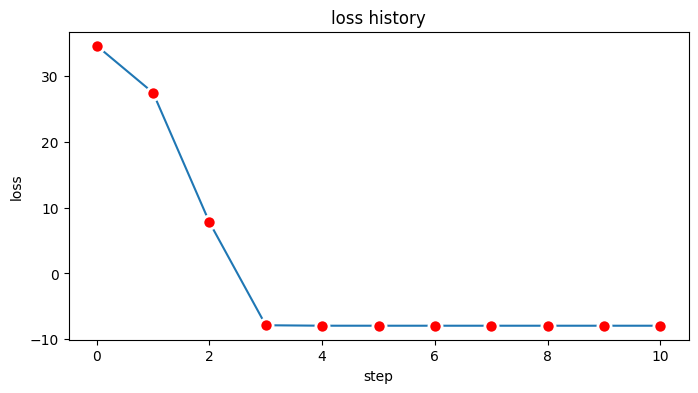

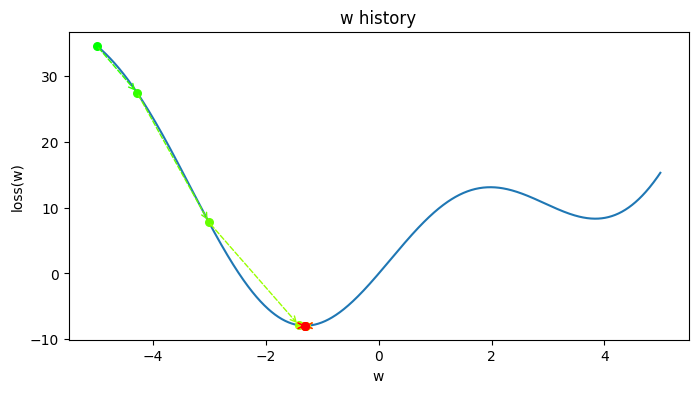

In [ ]:
# THỰC NGHIỆM 2

# Khởi tạo
w0 = -5.0
lr = 0.1
n = 20
max_epochs = 10

# Tối ưu bằng Batch Gradient Descent
(w_history, loss_history) = batch_GD(w0, lr, n, max_epochs)
loss_history_2 = loss_history
w_history_2 = w_history

# Minh họa kết quả
plot_loss_history(loss_history, points = True)
plot_w_history(w_history, loss_history, connector=True, wmin= -5, wmax = 6)

### BGD - Thực nghiệm 3:
*_w0 = -5.0, lr = 0.3, n = 20, max_epochs = 20_*

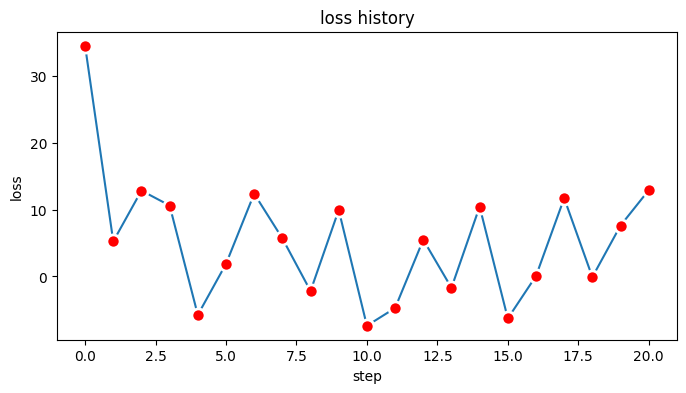

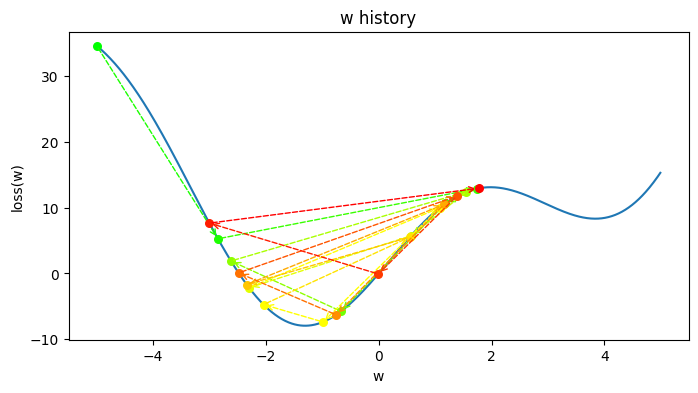

In [ ]:
# THỰC NGHIỆM 3

# Khởi tạo
w0 = -5.0
lr = 0.3
n = 20
max_epochs = 20

# Tối ưu bằng Batch Gradient Descent
(w_history, loss_history) = batch_GD(w0, lr, n, max_epochs)
loss_history_3 = loss_history
w_history_3 = w_history

# Minh họa kết quả
plot_loss_history(loss_history, points = True)
plot_w_history(w_history, loss_history, connector=True, wmin= -5, wmax = 6)

### BGD - Thực nghiệm 4:
*_w0 = 5.0, lr = 0.05, n = 20, max_epochs = 10_*

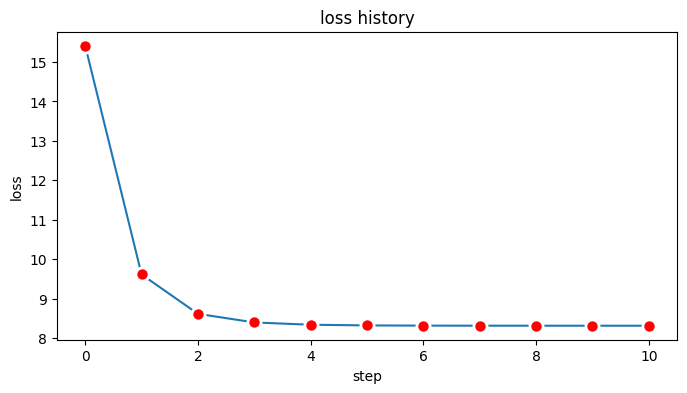

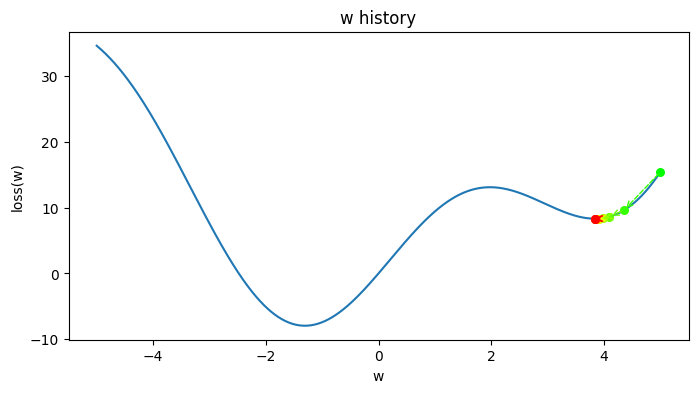

In [ ]:
# THỰC NGHIỆM 4

# Khởi tạo
w0 = 5.0
lr = 0.05
n = 20
max_epochs = 10

# Tối ưu bằng Batch Gradient Descent
(w_history, loss_history) = batch_GD(w0, lr, n, max_epochs)
loss_history_4 = loss_history
w_history_4 = w_history

# Minh họa kết quả
plot_loss_history(loss_history, points = True)
plot_w_history(w_history, loss_history, connector=True, wmin= -5, wmax = 6)

#### Trực quan hóa "loss history" của các thực nghiệm 1,2 và 3 trên cùng một biểu đồ;

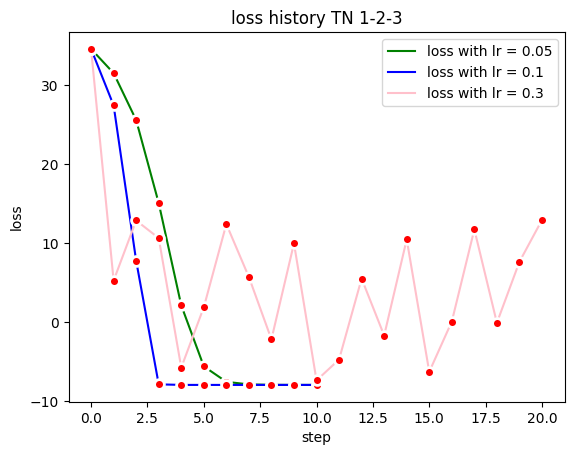

In [ ]:
#TN1: w0 = -5.0, lr = 0.05, n = 20, max_epochs = 10
plt.plot(loss_history_1, color ="green", label="loss with lr = 0.05")
plt.scatter(np.arange(0,len(loss_history_1),1),loss_history_1[:], s = 50, color = 'r', edgecolor = 'w', linewidth = 2,zorder = 3)

#TN2:w0 = -5.0, lr = 0.1, n = 20, max_epochs = 10
plt.plot(loss_history_2,  color ="blue", label="loss with lr = 0.1")
plt.scatter(np.arange(0,len(loss_history_2),1),loss_history_2[:], s = 50, color = 'r', edgecolor = 'w', linewidth = 2,zorder = 3)

#TN3: w0 = -5.0, lr = 0.3, n = 20, max_epochs = 20
plt.plot(loss_history_3, color ="pink", label="loss with lr = 0.3")
plt.scatter(np.arange(0,len(loss_history_3),1),loss_history_3[:], s = 50, color = 'r', edgecolor = 'w', linewidth = 2,zorder = 3)

plt.xlabel('step')
plt.ylabel('loss')
plt.title('loss history TN 1-2-3')
plt.legend()
plt.show()

#### Nhận xét kết quả khi thực hiện thuật toán BGD với các giá trị lr khác nhau (so sánh các thực nghiệm 1, 2, 3);

Nhận xét:
- Thực nghiệm 1 (với lr = 0.05): Ta thấy đường vẽ xanh lá cây mặc dù có sự giảm dần tuy nhiên tốc độ giảm chậm hơn so với hai đường còn lại (sau 6 bước đạt được mức thấp nhất).
- Thực nghiệm 2 (với lr = 0.1): Ta thấy đường vẽ xanh dương có sự giảm nhanh hơn TN1 và mặc dù chậm hơn TN3 tuy nhiên lại ổn định hơn TN3 sau khi đạt mức thấp nhất (sau 3 bước đạt được mức thấp nhất).
- Thực nghiệm 3 (với lr = 0.3): Ta thấy đường vẽ hồng mặc dù có sự giảm dần nhanh nhất tuy nhiên không đạt được sự ổn định và tìm được điểm thấp nhất chậm nhất(sau 11 bước đạt được mức thấp nhất).

=> Kết luận:
  - Với TN1 hàm loss giảm ổn định nhưng chậm. Với TN2 hàm loss có tốc độ giảm nhanh và ổn định. Với TN3 tốc độ giảm rất nhanh nhưng không ổn định.
  - Vì vậy, TN2 với lr = 0.1 là tối ưu nhất với hàm loss này.

#### Nhận xét kết quả khi thực hiện thuật toán BGD với các giá trị w0 khác nhau (so sánh thực nghiệm 1, 2, 3 với thực nghiệm 4);

Nhận xét:


*   w0 = -5: Ta có thể thấy thì giá trị hàm loss ban đầu lớn hơn (khoảng 33) nhưng sau đó giảm dần và ổn định về mức thấp nhất một cách nhanh chóng
*   w0 = 5: Ta có thể thấy thì giá trị hàm loss ban đầu nhỏ hơn (khoảng 16) sau đó giảm dần nhưng không ổn định và tăng đã tăng trở lại sau đó mới giảm dần về mức thấp nhất.

=> Kết luận: Với w0 = -5 hàm loss có sự giảm dần về mức thấp và ổn định và tốt hơn



## 2. Stochastic Gradient Descent (SGD)

### Cài đặt Stochastic Gradient Descent (SGD) (1.0 điểm)

In [30]:
# Cài đặt Thuật toán Stochastic Gradient Descent (SGD)
def SGD(w0, lr, n, max_epochs=1):
    w = w0
    w_history = [np.array(w)]
    loss_history = [loss(w)]
    for epoch in range(max_epochs):
        for i in range(n):
            # Lấy mẫu ngẫu nhiên
            np.random.randint(n)
            # Tính đạo hàm riêng
            grad = gradient(w)
            # Cập nhật tham số theo gradient
            w = w - lr * grad
            w_history.append(np.array(w))
            loss_history.append(loss(w))
    return w_history, loss_history

### SGD - Thực nghiệm 1: (0.5 điểm)
*_w0 = -5.0, lr = 0.05, n = 20, max_epochs = 1_*

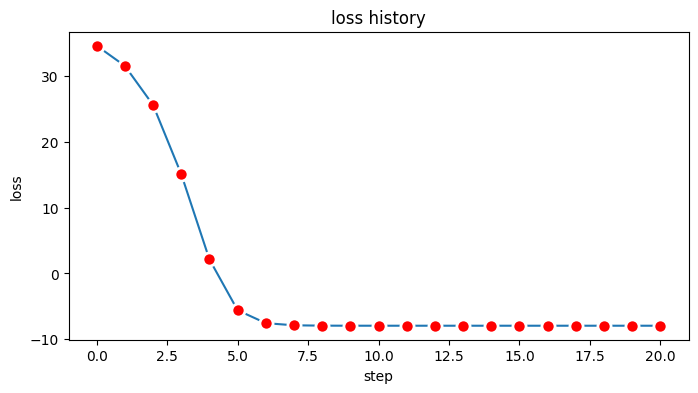

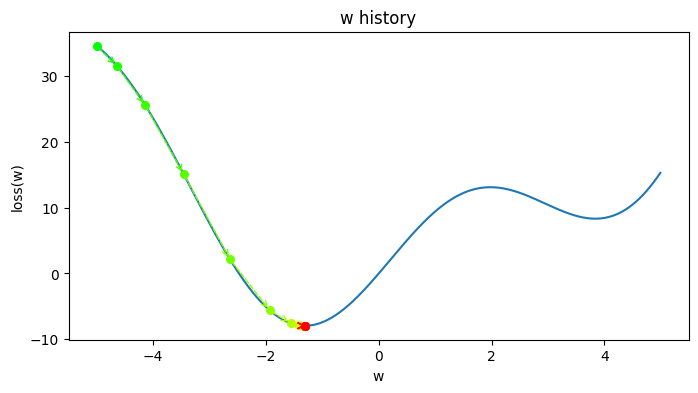

In [31]:
# SGD - THỰC NGHIỆM 1

# Khởi tạo
w0 = -5.0
lr = 0.05
n = 20
max_epochs = 1

# Tối ưu bằng Batch Gradient Descent
(w_history, loss_history) = SGD(w0, lr, n, max_epochs)

# Minh họa kết quả
plot_loss_history(loss_history, points = True)
plot_w_history(w_history, loss_history, connector=True, wmin= -5, wmax = 6)

### SGD - Thực nghiệm 2: (0.5 điểm)
*_w0 = 5.0, lr = 0.05, n = 20, max_epochs = 1_*

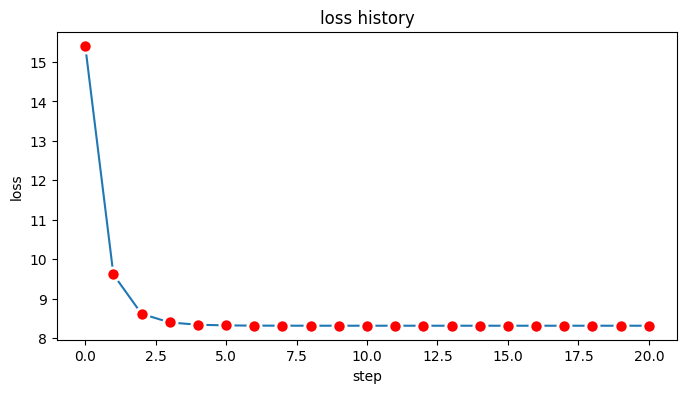

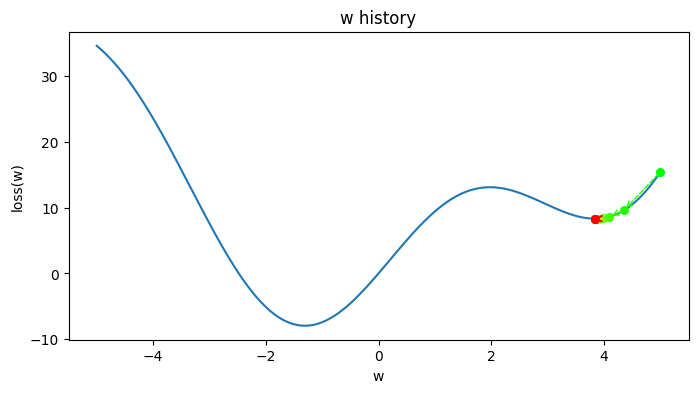

In [32]:
# SGD - THỰC NGHIỆM 2

# Khởi tạo
w0 = 5.0
lr = 0.05
n = 20
max_epochs = 1

# Tối ưu bằng Batch Gradient Descent
(w_history, loss_history) = SGD(w0, lr, n, max_epochs)

# Minh họa kết quả
plot_loss_history(loss_history, points = True)
plot_w_history(w_history, loss_history, connector=True, wmin= -5, wmax = 6)

## 3. Mini-Batch Gradient Descent (mBGD)

### Cài đặt Mini-Batch Gradient Descent (mBGD) (1.0 điểm)

In [33]:
# Cài đặt Thuật toán Mini-Batch Gradient Descent (BGD)
def mBGD(w0, lr, n, batch_size=2, max_epochs=1):
    w = w0
    w_history = [np.array(w)] # Lưu giá trị tham số w trong quá trình tối ưu
    loss_history = [loss(w)] # Lưu giá trị của hàm lỗi trong quá trình tối ưu
    for epoch in range(max_epochs):
        # Xáo trộn ngẫu nhiên thứ tự dữ liệu
        data_indices = np.random.permutation(n)
        for i in range(0, n, batch_size):
            # Lấy batch dữ liệu
            batch_indices = data_indices[i:i + batch_size]
            total_grad = 0
            for j in batch_indices:
                # Tính đạo hàm riêng
                grad = gradient(w)
                total_grad += grad
            # Cập nhật tham số theo gradient
            w = w - lr * (total_grad / len(batch_indices))
            w_history.append(np.array(w))
            loss_history.append(loss(w))
    return w_history, loss_history

### mBGD - Thực nghiệm 1: (0.5 điểm)
*_w0 = -5.0, lr = 0.05, n = 20, batch_size = 8, max_epochs = 10_*

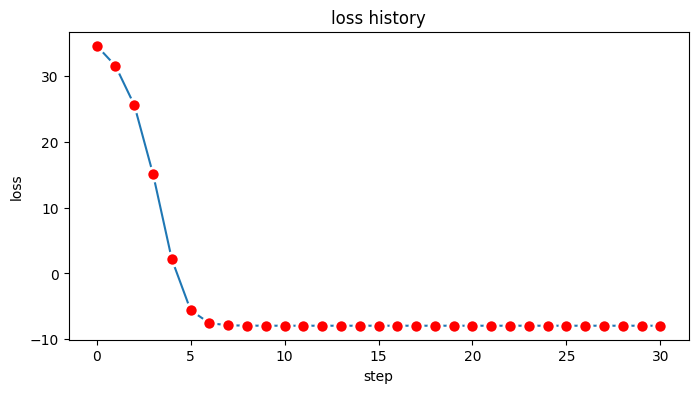

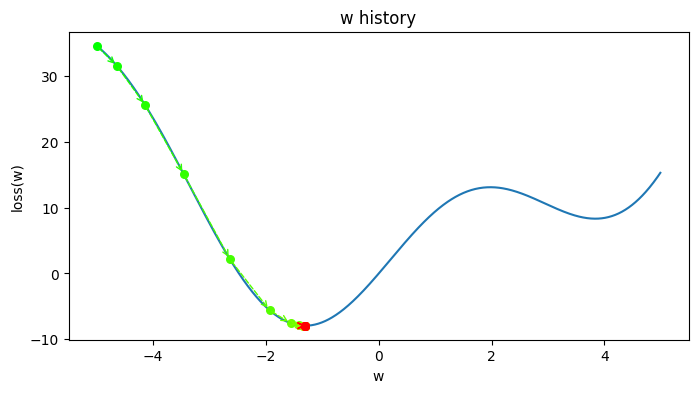

In [34]:
# mBGD - THỰC NGHIỆM 1

# Khởi tạo
w0 = -5.0
lr = 0.05
n = 20
batch_size = 8
max_epochs = 10

# Tối ưu bằng Batch Gradient Descent
(w_history, loss_history) = mBGD(w0, lr, n, batch_size, max_epochs)

# Minh họa kết quả
plot_loss_history(loss_history, points = True)
plot_w_history(w_history, loss_history, connector=True, wmin= -5, wmax = 6)

### mBGD - Thực nghiệm 2: (0.5 điểm)
*_w0 = 5.0, lr = 0.05, n = 20, batch_size = 8, max_epochs = 10_*

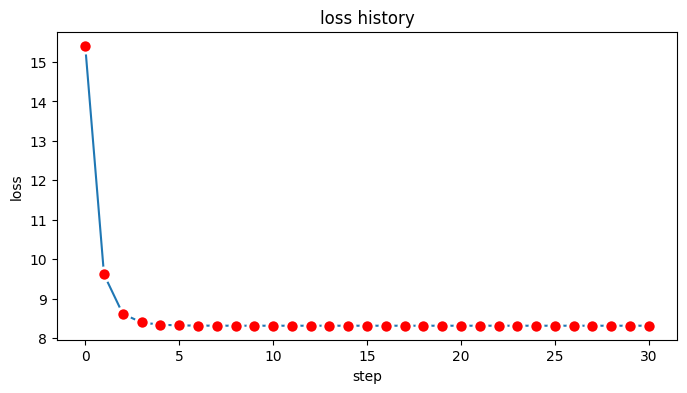

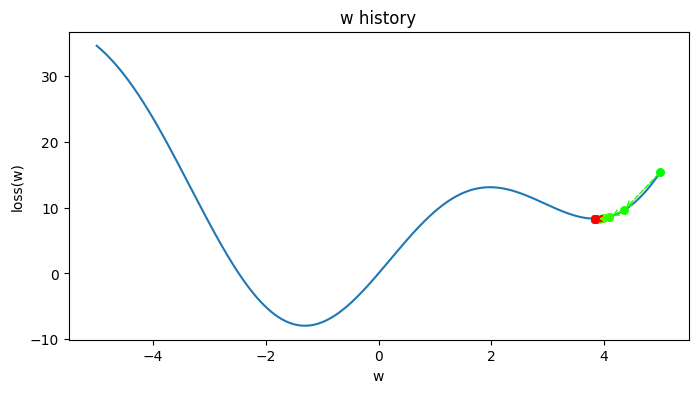

In [35]:
# mBGD - THỰC NGHIỆM 2

# Khởi tạo
w0 = 5.0
lr = 0.05
n = 20
batch_size = 8
max_epochs = 10

# Tối ưu bằng Batch Gradient Descent
(w_history, loss_history) = mBGD(w0, lr, n, batch_size, max_epochs)

# Minh họa kết quả
plot_loss_history(loss_history, points = True)
plot_w_history(w_history, loss_history, connector=True, wmin= -5, wmax = 6)


## SO SÁNH Batch GD và các biến thể của nó: (1.0 điểm)
  
|          |Batch Gradient Descent|Stochastic Gradient Descent|Mini-Batch Gradient Descent|
|:---------|:--------------------:|:-------------------------:|:-------------------------:|
|Giống nhau||Tối ưu hóa hàm loss dựa trên nguyên lý đạo hàm||
|Khác nhau |Sử dụng toàn bộ dữ liệu|Sử dụng một mẫu ngẫu nhiên|Sử dụng một nhóm mẫu nhỏ|
||Chậm nhưng ổn định|Nhanh nhưng có thể dao động|Cân bằng giữa hai phương pháp trên|
||Cần nhiều bộ nhớ|Tiêu thụ ít bộ nhớ|Tiêu thụ bộ nhớ trung bình|
||Cập nhật sau mỗi epoch|Cập nhật sau mỗi mẫu|Cập nhật sau mỗi mini-batch|
|Ưu điểm   |Đảm bảo hướng đi đúng vì sử dụng toàn bộ dữ liệu|Tính toán nhanh hơn vì cập nhật trọng số sau mỗi mẫu|Cân bằng giữa tốc độ và độ ổn định|
||Ổn định hơn trong quá trình học|Khả năng thoát khỏi cực tiểu cục bộ nhờ vào sự ngẫu nhiên|Có thể tận dụng tối đa khả năng của GPU nhờ vào việc xử lý nhiều mẫu cùng lúc|
|Nhược điểm|Thời gian tính toán lâu, đặc biệt với tập dữ liệu lớn|Dao động lớn trong quá trình hội tụ (có thể không hội tụ đến giá trị tối ưu)|Cần phải chọn kích thước batch phù hợp, có thể ảnh hưởng đến hiệu suất|
||Có thể mắc kẹt ở điểm cực tiểu cục bộ|Cần điều chỉnh hiệu số học cẩn thận|Nếu kích thước quá nhỏ, có thể vẫn gặp phải vấn đề dao động|

## 4. Stochastic Gradient Descent + Momentum (SGD + Momentum)

### Cài đặt SGD + Momentum (1.0 điểm)

In [36]:
# Cài đặt Thuật toán Stochastic Gradient Descent + Momentum(SGD + Momentum)
def SGD_momentum(w0, lr, n, max_epochs=1, momentum=0):
    w = w0
    v = 0
    w_history = [np.array(w)]
    loss_history = [loss(w)]
    for epoch in range(max_epochs):
        for i in range(n):
            # Lẫy mẫu ngẫu nhiên
            np.random.randint(n)
            # Tính gradient
            grad = gradient(w)
            # Tính momentum
            v = momentum * v - lr * grad
            # Cập nhật trọng số
            w = w + v
            w_history.append(np.array(w))
            loss_history.append(loss(w))
    return w_history, loss_history

### SGD + Momentum - Thực nghiệm 1: (0.5 điểm)
*_w0 = -5.0, lr = 0.05, n = 15, max_epochs = 1, momentum = 0 (tương đương thuật toán SGD không sử dụng Momentum)_*

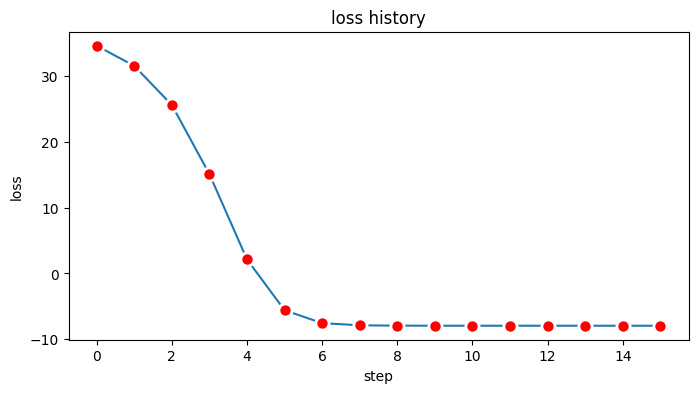

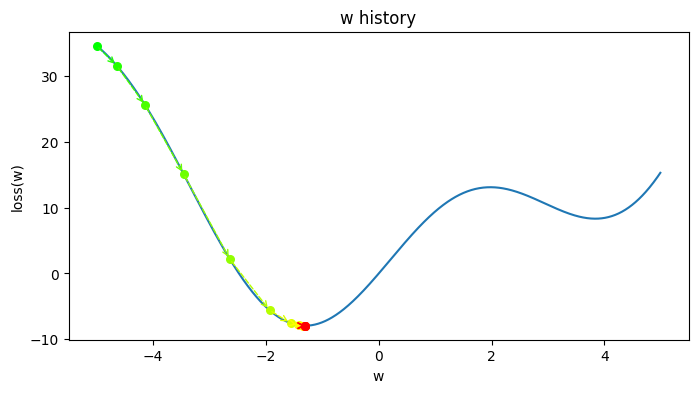

In [37]:
# SGD + Momentum - THỰC NGHIỆM 1

# Khởi tạo
w0 = -5.0
lr = 0.05
n = 15
max_epochs = 1
momentum = 0

# Tối ưu bằng Batch Gradient Descent
(w_history, loss_history) = SGD_momentum(w0, lr, n, max_epochs, momentum)

# Minh họa kết quả
plot_loss_history(loss_history, points = True)
plot_w_history(w_history, loss_history, connector=True, wmin= -5, wmax = 6)

### SGD + Momentum - Thực nghiệm 2: (0.5 điểm)
*_w0 = -5.0, lr = 0.05, n = 15, max_epochs = 1, momentum = 0.7_*

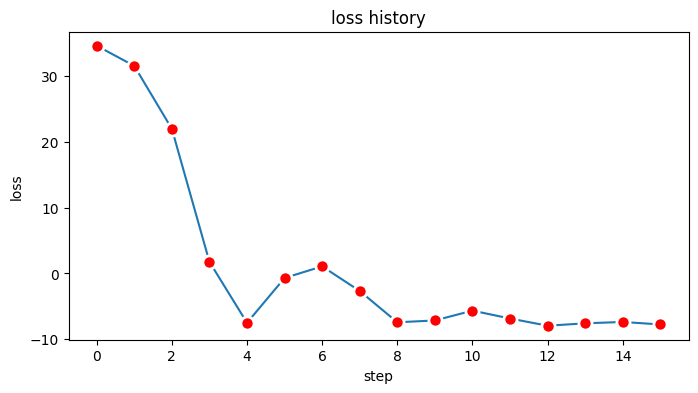

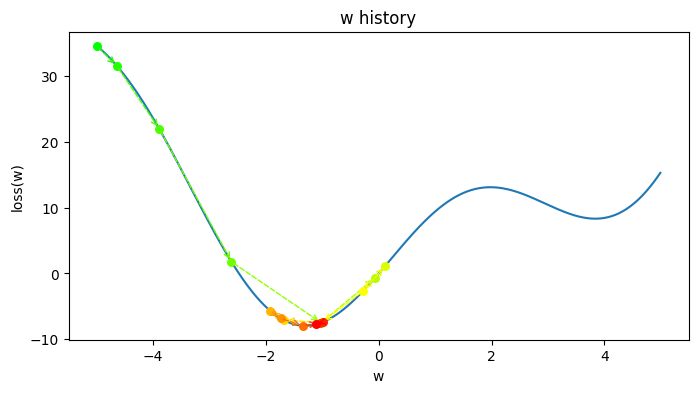

In [38]:
# SGD + Momentum - THỰC NGHIỆM 2

# Khởi tạo
w0 = -5.0
lr = 0.05
n = 15
max_epochs = 1
momentum = 0.7

# Tối ưu bằng Batch Gradient Descent
(w_history, loss_history) = SGD_momentum(w0, lr, n, max_epochs, momentum)

# Minh họa kết quả
plot_loss_history(loss_history, points = True)
plot_w_history(w_history, loss_history, connector=True, wmin= -5, wmax = 6)

### SGD + Momentum - Thực nghiệm 3: (0.5 điểm)
*_w0 = 5.0, lr = 0.06, n = 50, max_epochs = 1, momentum = 0 (tương đương thuật toán SGD không sử dụng Momentum)_*

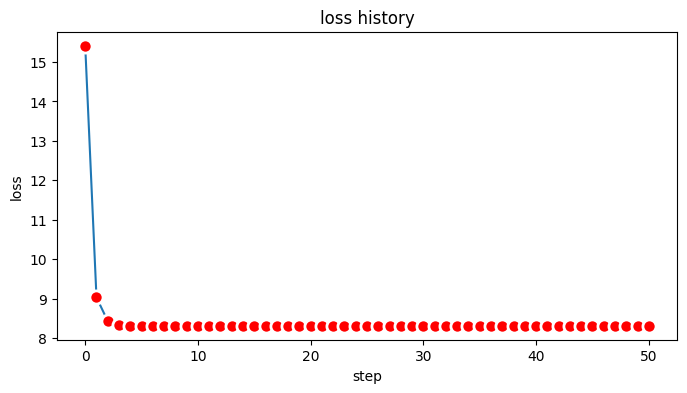

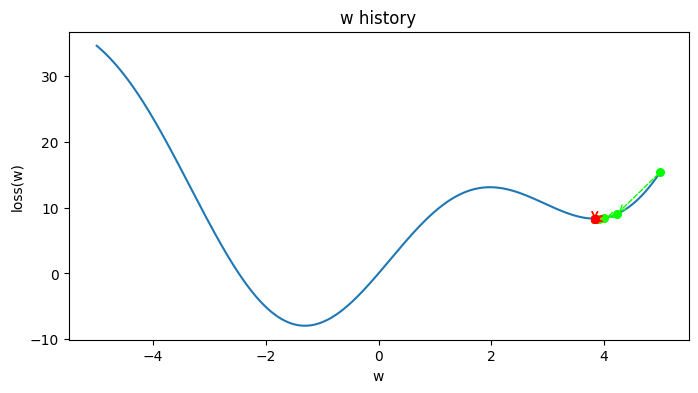

In [39]:
# SGD + Momentum - THỰC NGHIỆM 3

# Khởi tạo
w0 = 5.0
lr = 0.06
n = 50
max_epochs = 1
momentum = 0

# Tối ưu bằng Batch Gradient Descent
(w_history, loss_history) = SGD_momentum(w0, lr, n, max_epochs, momentum)

# Minh họa kết quả
plot_loss_history(loss_history, points = True)
plot_w_history(w_history, loss_history, connector=True, wmin= -5, wmax = 6)

### SGD + Momentum - Thực nghiệm 4: (0.5 điểm)
*_w0 = 5.0, lr = 0.06, n = 50, max_epochs = 1, momentum = 0.9_*

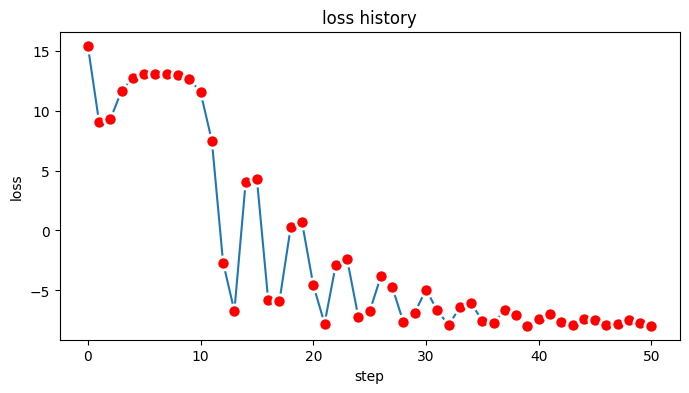

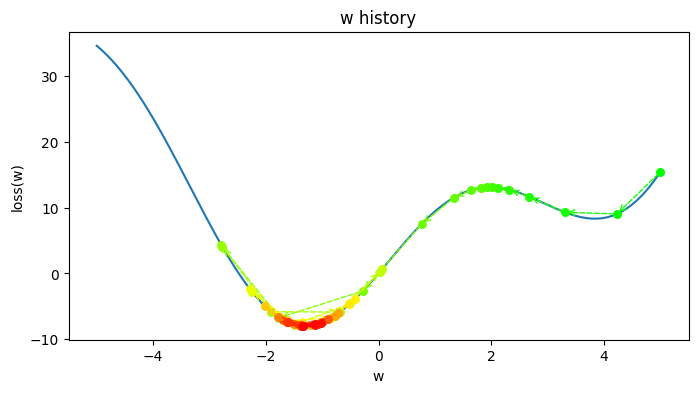

In [40]:
# SGD + Momentum - THỰC NGHIỆM 4

# Khởi tạo
w0 = 5.0
lr = 0.06
n = 50
max_epochs = 1
momentum = 0.9

# Tối ưu bằng Batch Gradient Descent
(w_history, loss_history) = SGD_momentum(w0, lr, n, max_epochs, momentum)

# Minh họa kết quả
plot_loss_history(loss_history, points = True)
plot_w_history(w_history, loss_history, connector=True, wmin= -5, wmax = 6)

### NHẬN XÉT MOMENTUM GD (1.0 điểm)
- Nhận xét kết quả thuật toán SGD + Momemtum ở thực nghiệm 1 và 2;
- Nhận xét kết quả thuật toán SGD + Momemtum ở thực nghiệm 3 và 4;
- So sánh sự khác nhau giữa thuật toán Gradient Descent thông thường và khi có Momentum.

#### Nhận xét kết quả thuật toán SGD + Momentum ở thực nghiệm 1 và 2

Thực nghiệm 1:
Các giá trị
w: bắt đầu từ
5 và dần dần giảm xuống gần giá trị
3.83746711
3.83746711, cho thấy quá trình hội tụ diễn ra khá mượt mà.

Hàm lỗi: Ban đầu hàm lỗi giảm mạnh từ
15.41 xuống 9.03, sau đó tiếp tục giảm nhưng chậm hơn và hội tụ dần ở mức
8.315585579.

Nhận xét: Thuật toán SGD + Momentum trong thực nghiệm này hội tụ tốt, giá trị
w giảm đều và dần dần tiến gần đến giá trị tối ưu.

Hàm lỗi cũng có xu hướng giảm đều, thể hiện sự hiệu quả của thuật toán trong việc tối ưu hóa.

Thực nghiệm 2:

Các giá trị
w: Bắt đầu từ giá trị
5 và giảm dần, nhưng sau đó dao động mạnh hơn so với thực nghiệm 1. Tuy nhiên, đến gần cuối, các giá trị w có xu hướng ổn định dần quanh giá trị 3.83746711.

Hàm lỗi: Hàm lỗi ban đầu giảm từ 15.41 xuống mức 9.03, sau đó giảm chậm hơn và dao động nhẹ quanh giá trị 8.315585579.

Nhận xét:
Mặc dù có sự dao động trong quá trình tối ưu hóa, nhưng cuối cùng các giá trị w và hàm lỗi vẫn hội tụ về mức gần giống thực nghiệm 1.
Tuy nhiên, việc dao động cho thấy quá trình tối ưu chưa thực sự mượt mà như trong thực nghiệm 1.

#### Nhận xét kết quả thuật toán SGD + Momentum ở thực nghiệm 3 và 4

Thực nghiệm 3:
Các giá trị w: ban đầu dao động mạnh, từ
5 rồi giảm dần xuống các giá trị âm, sau đó tiếp tục dao động nhưng không có sự ổn định rõ ràng. Sau hơn 50 lần cập nhật, các giá trị w vẫn chưa đạt được sự hội tụ.

Hàm lỗi: có sự biến động mạnh mẽ, từ giá trị dương xuống giá trị âm, rồi lại tăng lên. Các giá trị hàm lỗi cho thấy sự bất ổn trong quá trình tối ưu hóa.
Nhận xét: Thực nghiệm này không đạt được sự hội tụ như mong đợi. Các giá trị
w và hàm lỗi dao động lớn, cho thấy thuật toán gặp khó khăn trong việc tìm ra điểm tối ưu. Điều này có thể là do lựa chọn siêu tham số không phù hợp hoặc dữ liệu không tốt.

Thực nghiệm 4:
Các giá trị w bắt đầu từ 5 và dao động lớn, thường xuyên chuyển đổi giữa các giá trị dương và âm. Quá trình tối ưu diễn ra không ổn định và không hội tụ.

Hàm lỗi: dao động mạnh mẽ, không giảm đều mà biến đổi liên tục giữa các giá trị dương và âm, cho thấy sự thiếu hiệu quả của thuật toán trong việc giảm hàm lỗi.

Nhận xét: Tương tự thực nghiệm 3, thực nghiệm này cũng không đạt được kết quả tối ưu. Các giá trị w và hàm lỗi không hội tụ mà dao động mạnh, có thể cần phải điều chỉnh lại siêu tham số hoặc thay đổi cách tối ưu.


#### So sánh sự khác nhau giữa Gradient Descent thông thường và Gradient Descent có Momentum:

1. Gradient Descent thông thường:

Cách hoạt động: Gradient Descent thông thường chỉ sử dụng đạo hàm của hàm lỗi để cập nhật giá trị của các tham số. Mỗi bước di chuyển chỉ dựa vào gradient hiện tại.

Đặc điểm:

Khi gradient quá lớn, các bước di chuyển có thể trở nên quá mạnh và dẫn đến việc bỏ qua điểm tối ưu.

Khi gradient quá nhỏ, tốc độ hội tụ có thể chậm và dễ mắc kẹt ở các điểm cực tiểu cục bộ.

Thường dễ dao động khi đến gần điểm tối ưu, gây ra sự không ổn định trong quá trình tối ưu.
2. Gradient Descent có Momentum:

Cách hoạt động: Momentum kết hợp giữa gradient hiện tại và gradient trước đó để tạo ra một hiệu ứng "lực quán tính". Điều này giúp thuật toán di chuyển theo hướng tối ưu với tốc độ nhanh hơn và ít dao động hơn.

Đặc điểm:

Tốc độ hội tụ nhanh hơn: Momentum giúp thuật toán tích lũy quán tính trong các bước cập nhật, từ đó giúp quá trình hội tụ nhanh hơn và mượt mà hơn.

Giảm dao động: Momentum giảm thiểu tình trạng dao động khi đến gần điểm tối ưu, giúp quá trình hội tụ diễn ra ổn định hơn.

Khả năng thoát khỏi cực tiểu cục bộ: Nhờ vào quán tính, Momentum có thể giúp thuật toán thoát khỏi các điểm cực tiểu cục bộ, điều mà Gradient Descent thông thường khó thực hiện.